In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd


import Window_Function
import HERA_hack_FG
import pspec
import make_universe

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['ytick.labelsize']=24
plt.rcParams['xtick.labelsize']=24



%load_ext autoreload
%autoreload 2

In [2]:
################## TELESCOPE STUFF ##################
dishes = np.array([[0,0],[57.39295490174667,]])#,[30,30]]),[0,60],[2,55]])#,[47,2],[45,23],[56,21],[30,115],[48,52],[100,100],[0,200],[115,30],[33,31],[49,11],[21,24],[25,6],[56,9],[12,13],[16,17],[38,17],[60,14],[26,28],[6,45],[3,37],[12,55],[200,0],[145,13],[134,65],[139,163]])
data = np.loadtxt('/Users/hannahfronenberg/desktop/MSC1/HERA Noise/hera_positions_staged/antenna_positions_128.dat')
hera_bls = data[:,:-1]

#dishes = np.array([[0,0],[33.33,0],[0,70.71],[33.33, 70.71]])
acorner = np.array([[120,270],[122,276],[120,276],[122,270]])

HERA = HERA_hack_FG.telescope(dishes, latitude=-30, channel_width=0.1, Tsys=300, beam_width=3, beam = 'gaussian')

obs = HERA_hack_FG.observation(HERA, 1, 150, 0.11,acorner,1, 0.2, norm = True, pbeam = False)

obs.compute_M(None,None)

Ly = 100
Lx = 100

################### WINDOW STUFF ###############


window = Window_Function.Window_Function(obs.Mmat,obs.sky_shape[0],obs.sky_shape[1],obs.delta_phi,obs.delta_theta,150,40)





2


In [3]:
################### MAKE UNIVERSE STUFF ################
Ly = 1000
Lx = 1000

#restrict power spectrum only to the observable modes!
def ps(x):
    mu, sigma = 0.02,0.004
    return  np.exp( - (x - mu)**2 / (2 * sigma**2))


x = np.linspace(0,0.05,100)

make_uni = make_universe.universe(ps,obs.sky_shape[0],obs.sky_shape[1],Ly,Lx, mean = 0) #100 Mpc by 100Mpc

universe = make_uni.make_2D_universe()

stacked_sky = np.hstack(universe.T)

# plt.imshow(universe)
# plt.colorbar()

power_spec = pspec.Power_Spectrum(universe,1000 ,1000,40,False) #100 Mpc by 100Mpc --> have to scale fft I think 
pk_real = power_spec.compute_2D_pspec()

In [6]:
kk_universe,edges_universe ,pk_universe = window.compute_pspec_estimate(pk_real)





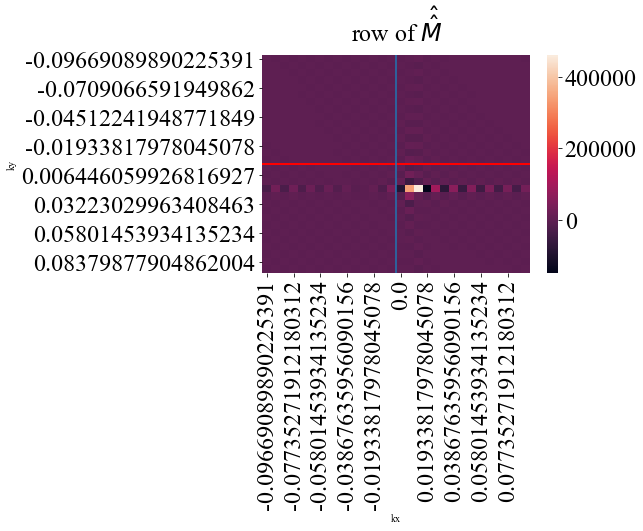

In [7]:


kk = np.concatenate(np.dstack(np.meshgrid(window.k_row, window.k_col)))


df_obs = pd.DataFrame.from_dict(np.array([np.flip(kk[:,1]),kk[:,0],np.real(window.M_tilde[458])]).T)
df_obs.columns = ['kx','ky','window']



pivotted_obs= df_obs.pivot('kx','ky','window')

ax = plt.axes()

sns.heatmap(pivotted_obs.T, ax=ax)
ax.axhline(y = np.where(window.k_col == 0)[0][0], color = 'r',linewidth=2)
ax.axvline(x = np.where(window.k_col == 0)[0][0])
ax.set_title('row of $\hat{\hat{M}}$', y = 1.04, fontsize = 24)
# ax.xaxis.set_major_locator(plt.MaxNLocator(6))
# ax.yaxis.set_major_locator(plt.MaxNLocator(6))
# # xlabels = [item.get_text() for item in ax.get_xticklabels()]
# # ylabels = [item.get_text() for item in ax.get_yticklabels()]
# # ax.set_xticklabels([str(round(float(label), 2)) for label in xlabels])
# # ax.set_yticklabels([str(round(float(label), 2)) for label in ylabels])

plt.show()

max(np.real(np.reshape(window.M_flip_tot,(30*30,)))) #Using FFT with K reordering
>>281338.95653760235

max(np.real(np.reshape(window.m_shift2,(30*30,)))) #Using IFFT with scaling 
>>281338.95653760235

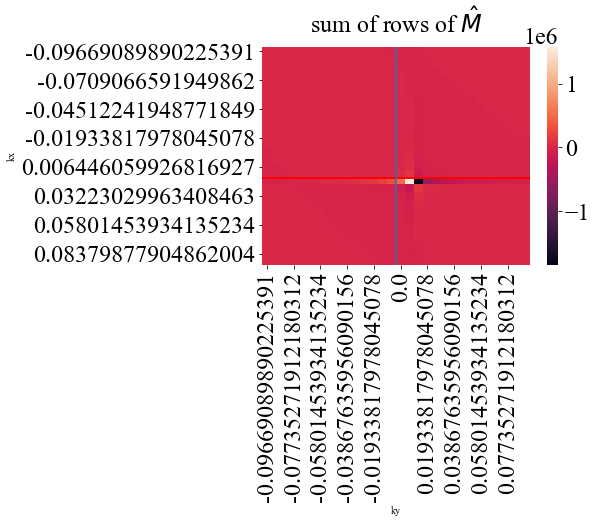

In [119]:

df_obs = pd.DataFrame.from_dict(np.array([np.flip(kk[:,1]),kk[:,0],np.real(np.sum(window.Mbar, axis = 0))]).T)
df_obs.columns = ['ky','kx','window']



pivotted_obs= df_obs.pivot('ky','kx','window')

ax = plt.axes()

sns.heatmap(pivotted_obs.T, ax=ax)
ax.axhline(y = np.where(window.k_col == 0.01933817978045078)[0][0], color = 'r',linewidth=2)
ax.axvline(x = np.where(window.k_col == 0)[0][0])
ax.set_title('sum of rows of ${\hat{M}}$', y = 1.04, fontsize = 24)
# ax.xaxis.set_major_locator(plt.MaxNLocator(6))
# ax.yaxis.set_major_locator(plt.MaxNLocator(6))
# # xlabels = [item.get_text() for item in ax.get_xticklabels()]
# # ylabels = [item.get_text() for item in ax.get_yticklabels()]
# # ax.set_xticklabels([str(round(float(label), 2)) for label in xlabels])
# # ax.set_yticklabels([str(round(float(label), 2)) for label in ylabels])

plt.show()


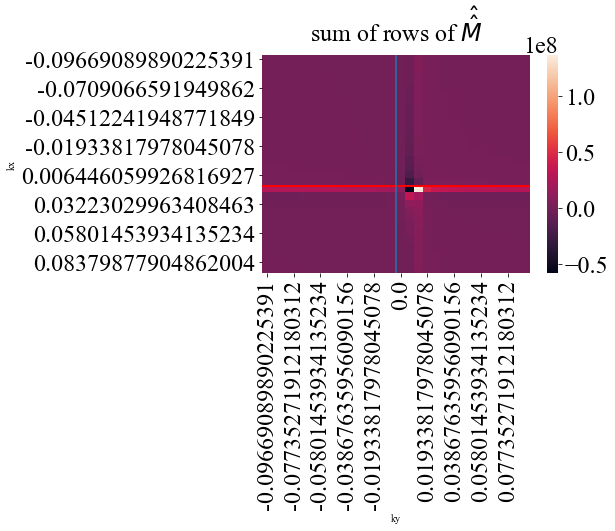

In [111]:
df_obs = pd.DataFrame.from_dict(np.array([np.flip(kk[:,1]),kk[:,0],np.real(np.sum(window.M_tilde, axis = 1))]).T)
df_obs.columns = ['ky','kx','window']



pivotted_obs= df_obs.pivot('ky','kx','window')

ax = plt.axes()

sns.heatmap(pivotted_obs.T, ax=ax)
ax.axhline(y = np.where(window.k_col == 0.01933817978045078)[0][0], color = 'r',linewidth=2)
ax.axvline(x = np.where(window.k_col == 0)[0][0])
ax.set_title('sum of rows of $\hat{\hat{M}}$', y = 1.04, fontsize = 24)
# ax.xaxis.set_major_locator(plt.MaxNLocator(6))
# ax.yaxis.set_major_locator(plt.MaxNLocator(6))
# # xlabels = [item.get_text() for item in ax.get_xticklabels()]
# # ylabels = [item.get_text() for item in ax.get_yticklabels()]
# # ax.set_xticklabels([str(round(float(label), 2)) for label in xlabels])
# # ax.set_yticklabels([str(round(float(label), 2)) for label in ylabels])

plt.show()

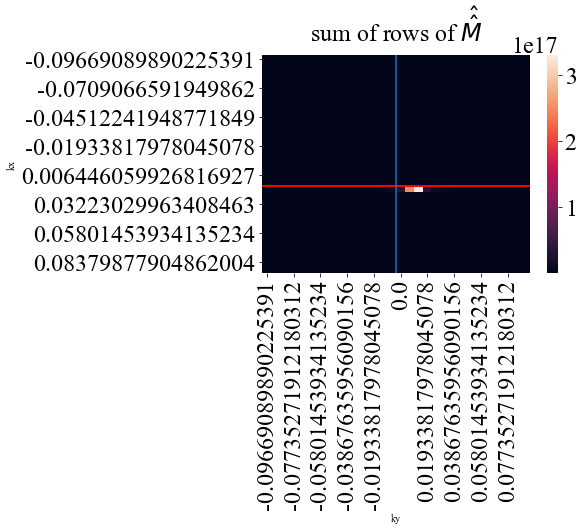

In [114]:
df_obs = pd.DataFrame.from_dict(np.array([np.flip(kk[:,1]),kk[:,0],np.real(np.sum(window.window, axis = 1))]).T)
df_obs.columns = ['ky','kx','window']



pivotted_obs= df_obs.pivot('ky','kx','window')

ax = plt.axes()

sns.heatmap(pivotted_obs.T, ax=ax)
ax.axhline(y = np.where(window.k_col == 0.01933817978045078)[0][0], color = 'r',linewidth=2)
ax.axvline(x = np.where(window.k_col == 0)[0][0])
ax.set_title('sum of rows of $\hat{\hat{M}}$', y = 1.04, fontsize = 24)
# ax.xaxis.set_major_locator(plt.MaxNLocator(6))
# ax.yaxis.set_major_locator(plt.MaxNLocator(6))
# # xlabels = [item.get_text() for item in ax.get_xticklabels()]
# # ylabels = [item.get_text() for item in ax.get_yticklabels()]
# # ax.set_xticklabels([str(round(float(label), 2)) for label in xlabels])
# # ax.set_yticklabels([str(round(float(label), 2)) for label in ylabels])

plt.show()